<a href="https://colab.research.google.com/github/Nikitoniy/Yandex_Data_Analysis/blob/main/2_%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BE%D0%B1%D1%8A%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%BE_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B5_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Откройте файл с данными и изучите общую информацию.

**Цель исследования**: необходимо по ходу исследования скорректировать изначальную таблицу с данными, а именно: проанализировать и убрать аномальные значения, поменять типы данных в колонках; убрать там, где можно, пустые значения и пропуски; убрать дубликаты. В процессе исследования будут просчитаны: цена квадратного метра квартиры; расстояние до центра города в километрах для более удобного расчета; тип этажа квартиры; день, месяц и год публикации объявления. Также необходимо составить графики для среднего распределения объявлений: по стоимости квартиры, ее площади, количеству комнат и тд. Далее необходимо произвести исследовательский анализ данных: будут просчитать отношения стоимосфти квартиры к ее общей площади, жилой и кухонной; также просчитать стоимость к количеству комнат и типу этажа; необходимо просчитать зависимость стоимости от дня недели публикации, месяцу и году. После чего проанализировать самые популярные объявления, проанализировать из них самые дорогие и дешевые. А также проанализировать стоимость квадратного метра в зависимости от расстояния до центра города в самом популярном населенном пункте по объявлениям.

Описание данных:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Импорт библиотек и настроек:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")

### Общая информация по датасету

In [ ]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep ='\t')
#читаю + табуляция
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Первые десять строк для ознакомления с датасетом

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Гистограмы для числовых показателей

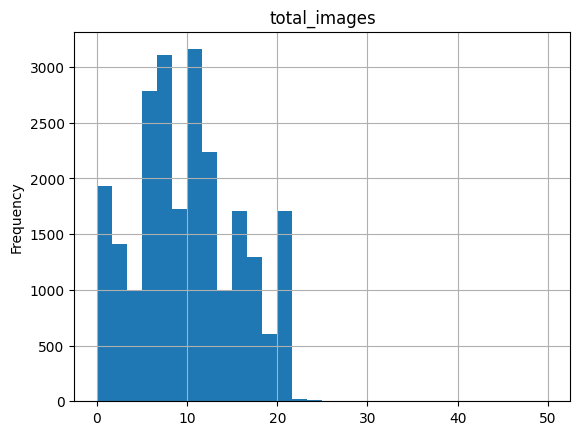

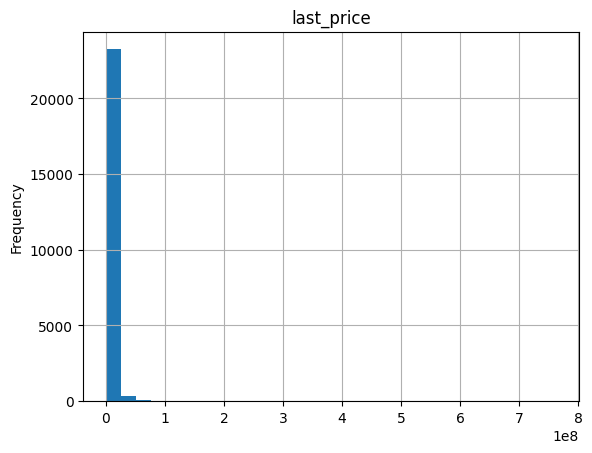

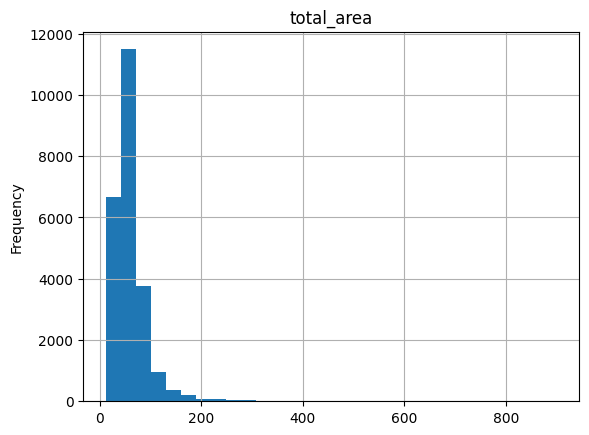

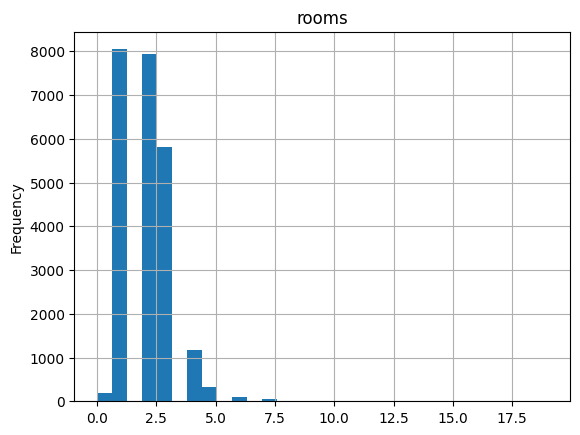

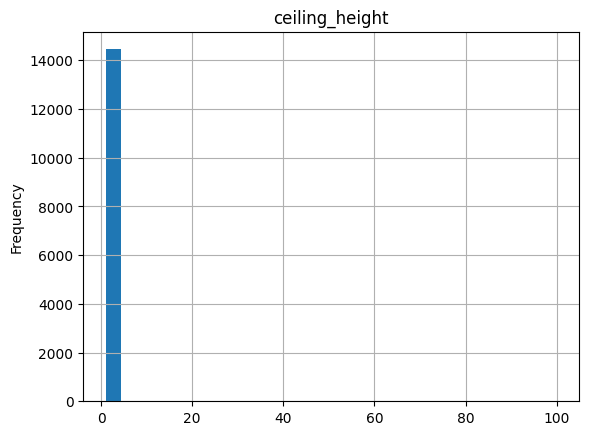

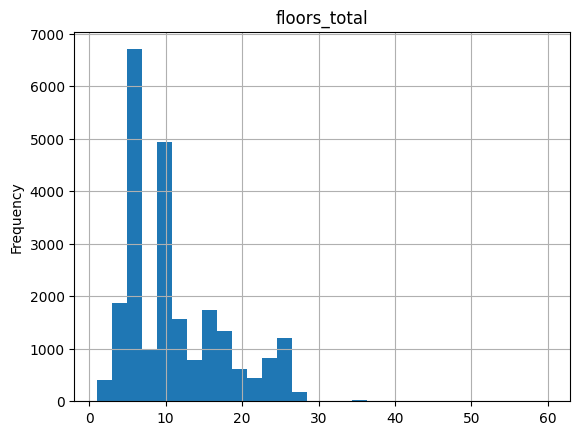

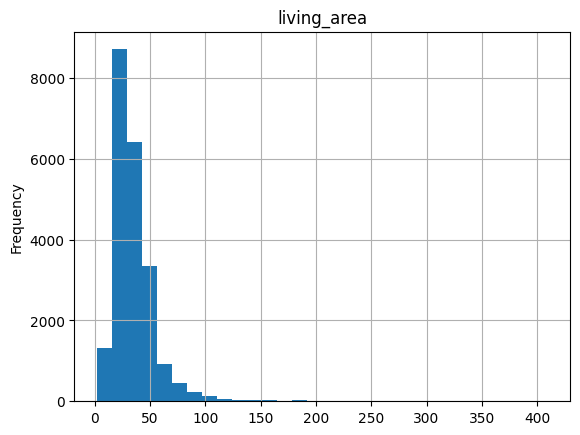

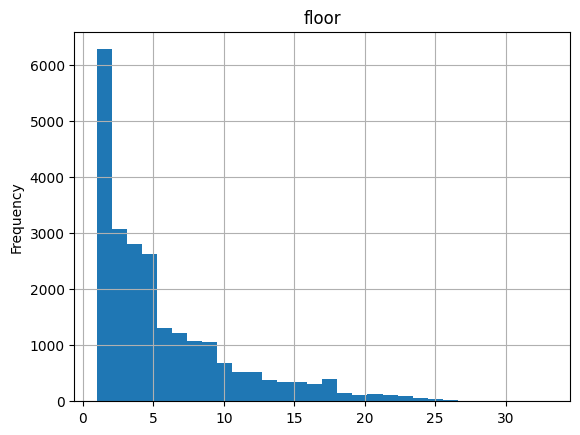

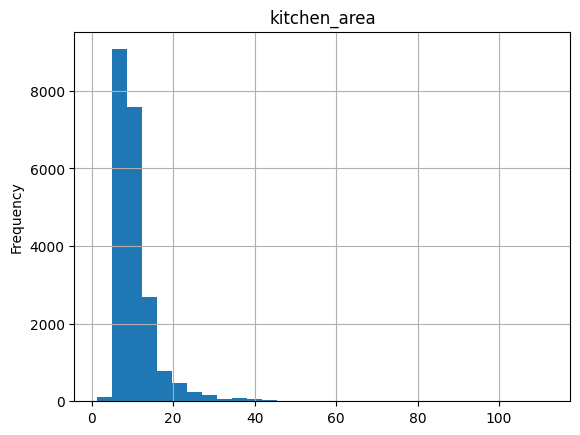

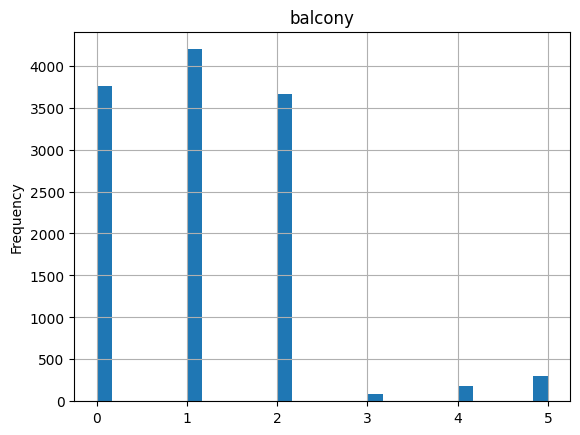

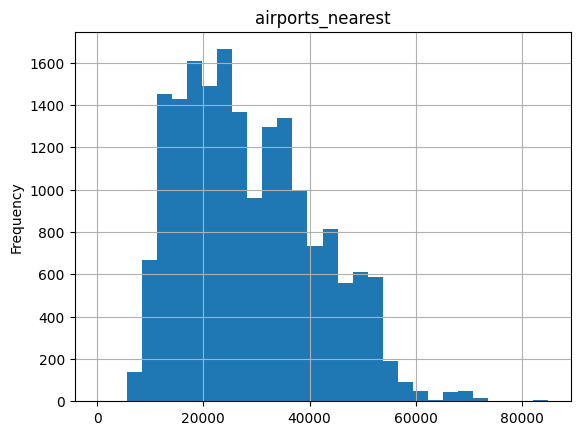

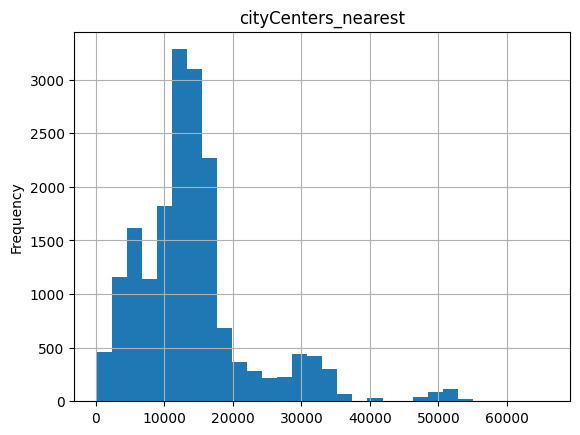

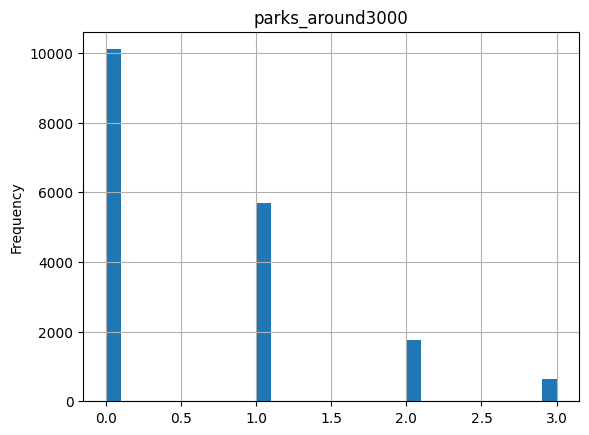

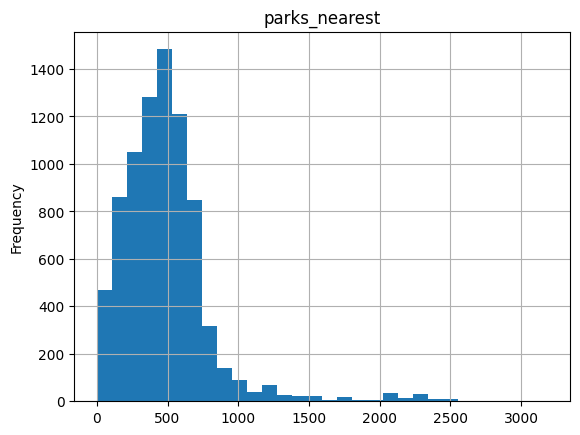

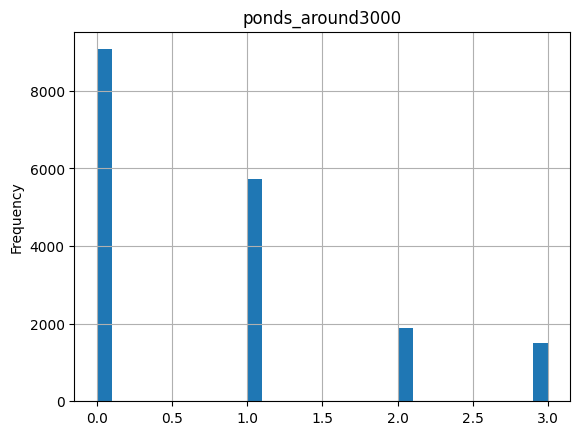

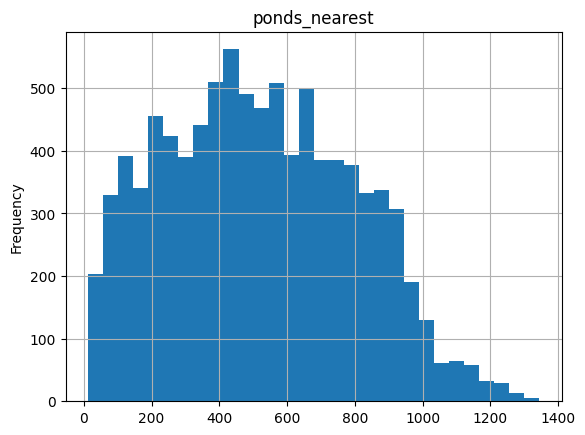

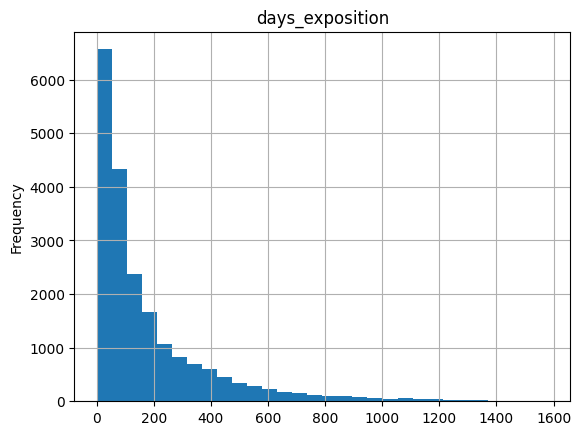

In [ ]:
def build_histograms(df):
    # Перебираем столбцы DataFrame
    for column in df.columns:
        # Проверяем тип столбца
        if df[column].dtype in [float, int]:
            # Строим гистограмму для столбца
            df[column].plot(xlabel = column, ylabel = 'Count', kind='hist', title=column, grid=True, bins=30)
            plt.show()  # Отображаем гистограмму

build_histograms(data) #использования гистограммы для "дата"

По итогам выявления первичной информации по таблице выявлены некоторые замечания:
1. `first_day_exposition` - тип object - должен быть datetime, тк в колонке указана дата и время;
2. `ceiling_height` - присутствуют пустые значения;
3. `floors_total` - тип float - должен быть int, тк подразумевается целое число;
4. `living_area` - присутствуют пустые значения;
5. `is_apartment` - тип object - должен быть тип булево;
6. `kitchen_area` - присутствуют пустые значения;
7. `balcony` - тип object - должен быть булево + пустые значения;
8. `locality_name` - пустые значения;
6. `airports_nearest` - пустые значения;
7. `cityCenters_nearest` - присутсвутют пустые значения;
8. `parks_around3000` - тип object - подразумевается целое число + пустые значения;
9. `parks_nearest` - присутсвутют пустые значения;
10. `ponds_around3000` - тип object - подразумевается целое число + пустые значения;
11. `ponds_nearest` - пустые значения;
12. `days_exposition` - тип float - должен быть int, тк подразумевается целое число + пустые значения;

## Предобработка данных

### Общее количество пустых значений в колонках

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Приведем колонки к нужным типам данных в соответствии с замечаниями

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
    #привел к типу датавремя + убрал время, тк везде 00:00:00

data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)
#привожу к типу булево, по умолчанию - ложь

data['balcony'] = data['balcony'].fillna(0).astype(int)
#убрал пустые значения в колонке balcony, заменив на 0 + поменял тип колонки

data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)

#в колонках ponds_around3000 и parks_around3000 равное количество пустых значений, предполагаю, что пустые зачения
#означают отсутсвия рядом водоемов и парков соответственно
#меняю пустые значения на 0

data.info() #промежуточный итог

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Поведем промежуточный итог**: были изменены типы колонок в соответствии с замечаниями. Изменил пустые значения в колонках `is_apartment`, `balcony`, `ponds_around3000`, `parks_around3000`. Считаю, что пустые значения означают их отсутствие в объявлении - все пустые значения изменил на 0.

### Предобработка данных: исследование колонки `locality_name`

#### Я хочу отбросить данные с пустым наименованием населенного пункта. Оценим в процентах, сколько данных будет удалено. Если процент не составит более 5-10%, то такие данные уберу.

In [ ]:
data['locality_name'].isna().sum()

data.query('locality_name == "nan"')
#табличка для просмотра значений

display(round((data.query('locality_name == "nan"')['locality_name'].count()
               / data['total_images'].count())*100, 3))
#взял строки с наименованием "nan" и поделил на колонку без пустых значений в таблице

data = data[data['locality_name'] != "nan"]
#удаляю значения с наименованием "nan" в колонке locality_name

0.0

Получилось 0.2%, такие данные несильно повлияют на дальнейший анализ, поэтому такие значения убираю.

#### Далее избавимся от дубликатов в наименованиях

In [ ]:
data['locality_name'].unique()
#нашел дубликаты в названиях населенных пунктов

data['locality_name'] = data['locality_name'].str.lower().replace('ё', 'е', regex=True)
    #привожу к нижнему регистру
    #+ меняю буквы с "ё" на "е"
    #также есть пропущеные значения в виде "nan", но менять не буду, тк причина отсутсвия неизвеста

data['locality_name'] = data['locality_name'].replace('мурино', 'поселок мурино')
data['locality_name'] = data['locality_name'].replace('кудрово', 'деревня кудрово')
data['locality_name'] = data['locality_name'].replace('городской поселок федоровское', 'деревня федоровское')
data['locality_name'] = data['locality_name'].replace('никольское', 'село никольское')
data['locality_name'] = data['locality_name'].replace('городской поселок павлово', 'село павлово')
data['locality_name'] = data['locality_name'].replace('любань', 'поселок любань')
data['locality_name'] = data['locality_name'].replace('деревня гарболово', 'поселок гарболово')
data['locality_name'] = data['locality_name'].replace(['поселок городского типа','городской поселок'],
                                                      'поселок',regex=True)
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции',
                                                      'поселок станции',regex=True)
# поселки городского типа меняю на городские поселки
# городские поселки меняю на поселки
# поселки при железной станции меняю на поселки станции

data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'шлиссельбург', 'село никольское',
       'зеленогорск

**Подведем промежуточный итог**: в колонке `locality_name` были замечены дубликаты. Одни и те же названия населенных пунктов с буквами "е" и "ё". Также в колонке `locality_name` поменял все названия населенных пунктов с "поселок городского типа",городской поселок" на "поселок", населенные пункты с наименованием "поселок при железнодорожной станции" на "поселок станции". Были удалены строки с наименованием населенного пункта "nan", такие данные заняли 0.2% от общего датасета.

### Предобработка данных: продолжаю убирать пустые значения, также убираю аномальные значения

#### В колонке `ceiling_height` замечено слишком много пустых значений, заполним медианными значениями.

In [ ]:
data.isna().sum() #в колонке ceiling_height замечено слишком много пустых значений
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == t), 'ceiling_height'].median()

data['ceiling_height'].unique()
#заполняю пропуски медианным значением по locality_name

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            134
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Отбросим данные с аномальными значениями. Оценим в процентах, сколько данных будет удалено. Если процент не составит более 5-10%, то такие данные уберу.

In [ ]:
data['ceiling_height'].isna().sum()

data.query('ceiling_height < 2 or ceiling_height > 100')
#табличка для просмотра значений

display(round((data.query('ceiling_height < 2 or ceiling_height > 100')['ceiling_height'].count()
               / data['total_images'].count())*100, 3))
#взял строки с наименованием "nan" и поделил на колонку без пустых значений в таблице

data = data.query('ceiling_height > 2 or ceiling_height < 100')
#удаляю значения с наименованием "nan" в колонке locality_name

0.013

**Подведем промежуточный итог**: заполнил пустые значения по данной колонке медианными, которые были просчитаны по каждому населенному пункту. После этого были удалены строки с аномальными значениями: высота более 100 м и менее 2 м.

#### Проверка остальных колонок на аномальные значения

In [ ]:
data['kitchen_area'].value_counts()
data['living_area'].value_counts()
data[data['living_area'].isna()].head(20)
#не выявил закономерности в отсутствии данных,
# сложно будет взять только медианы у колонок и подставить на место пустых значений,
# тк есть total_area, которая представляет собой суммы колонок kitchen_area и living_area

data['floors_total'].value_counts()
#непонятны происхождения путсых значений, поэтому пустые значения оставляю

data['floors_total'].unique()

data['airports_nearest'].value_counts()
data['cityCenters_nearest'].value_counts()
data['parks_nearest'].value_counts()
data['ponds_nearest'].value_counts()
data['rooms'].value_counts()
#просмотр колонок для выявления нестандартных значений и ошибок для предобработки
#данные колонки не редактирую

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1876
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2244
balcony                     0
locality_name              14
airports_nearest         5442
cityCenters_nearest      5419
parks_around3000            0
parks_nearest           15494
ponds_around3000            0
ponds_nearest           14472
days_exposition          3157
dtype: int64

**Подведем промежуточный итог**: В остальных колонках с пустыми значениями не было выявлено закономерностей, к тому же, некоторые из них, такие как: `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` должны были заполняться автоматически, но мы видим в данных колонках пустые значения, поэтому оставил как есть.

### Предобработка данных: предобработка данных в `days_exposition`

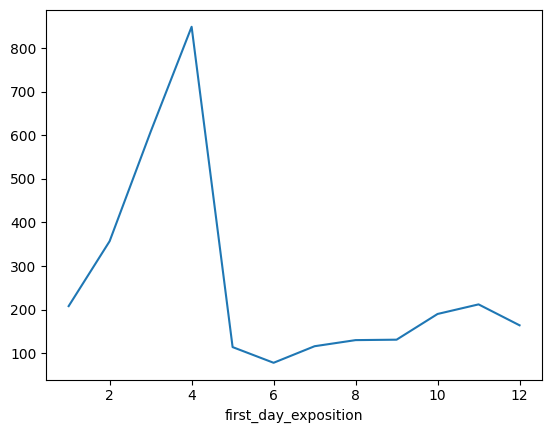

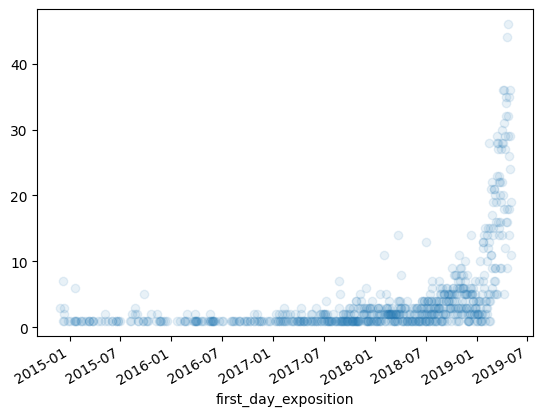

In [ ]:
data['days_exposition'].isna().sum()
data[data['days_exposition'].isna()].groupby(data['first_day_exposition'].dt.month).size().plot()
plt.show()
data[data['days_exposition'].isna()].groupby('first_day_exposition').size().plot(style='o',alpha=0.1)
plt.show()
#группирую по дате ищу количество пустых значений в колонке days_exposition

**Подведем ромежуточный итог**: сложно дать оценку пустым значениям в колонке `days_exposition`, поэтому пустые значения никак не изменял. Видимо, это как-то связано с условиями самого сервиса по размещению. Нашел следующую информацию о сервисе Яндекса: "За полгода можно разместить одно или два бесплатных объявлени", на основе которого можно сделать вывод о том, что каждые полгода объявления удаляется автоматически, без дальшейшего продления.

### В ходе анализа были выявлены аномальные значения в колонке `days_exposition`

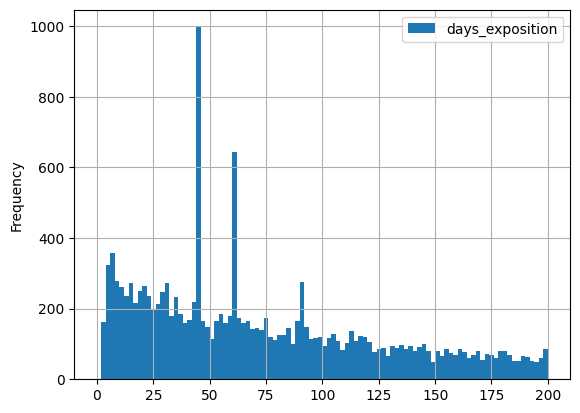

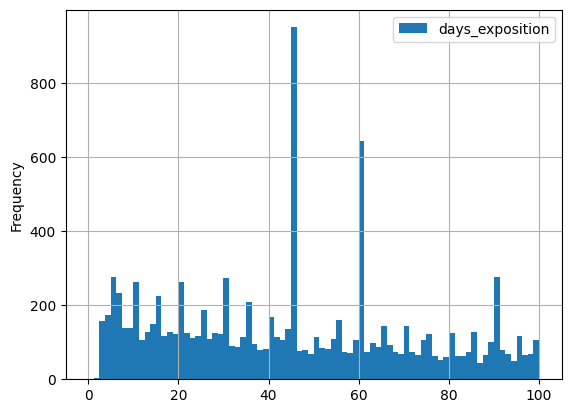

3.268

count    19638.000000
mean       186.426469
std        222.502455
min          1.000000
25%         45.000000
50%        102.000000
75%        241.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
#сильные различия у среднего и медианы, необходимо убрать аномальные значения
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, range = (0,200))
plt.show() #на этой гистограмме нашел аномальные значения
data.plot(y = 'days_exposition', kind = 'hist', bins = 80, grid=True, range = (0,100))
plt.show()
data['days_exposition'].describe()
#сильные различия у среднего и медианы, необходимо убрать аномальные значения

data['days_exposition'].value_counts()
#значения 45, 60, 7 являются аномальными

display(round((data.query('days_exposition in [7, 45, 60]')['days_exposition'].count()
               / data['total_images'].count())*100, 3))

data['days_exposition']
data = data.query('days_exposition not in [7, 45, 60]')
data['days_exposition'].describe()

**Подведем промежуточный итог**: выявил аномальные значения в колонке `days_exposition`: 7, 45 и 60 дней с момента объявления публикации. Думаю, это все так же связано с условиями пользованием сайта, как и с пустыми значениями. Такие данные занимают всего 3%, поэтому они не сильно повлияют на дальнейший анализ.

### Итоги по предобработке:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22795 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22795 non-null  int64         
 1   last_price            22795 non-null  float64       
 2   total_area            22795 non-null  float64       
 3   first_day_exposition  22795 non-null  datetime64[ns]
 4   rooms                 22795 non-null  int64         
 5   ceiling_height        22795 non-null  float64       
 6   floors_total          22710 non-null  float64       
 7   living_area           21128 non-null  float64       
 8   floor                 22795 non-null  int64         
 9   is_apartment          22795 non-null  bool          
 10  studio                22795 non-null  bool          
 11  open_plan             22795 non-null  bool          
 12  kitchen_area          20753 non-null  float64       
 13  balcony         

**Вывод**: выше вывел состояние таблицы на данном этапе.

Какие действия были проделаны на этапе предобработки:
1. Были изменены типы данных в колонках в соответствии с пунктом 1.7;
2. Были убраны дубликаты значений в названиях населенных пунктнов - все записи теперь написаны строчными буквами, заменены буквы "ё" на "е", а также изменены названия населеенных пунктов: с "поселок городского типа","городской поселок" на "поселок", с "поселок при железнодорожной станции" на "поселок станции" и др.;
3. В названиях населенных пунктов присутствовали пустые значения - такие данные были удалены;
4. Обнаружено большое количество отсутствующих данных в колонке `ceiling_height` - такие значения были изменены медианными по населенному пункту;
5. Были удалены аномальные значения в колонке `ceiling_height`, в которых высота более 100 м и менее 2 м;
6. Выявил аномальные значения в колонке days_exposition: 7, 45, 60 дней. Такие строки были удалены;
7. В целом удаленные данные составляют ~4% от всех данных, можно сделать вывод о том, что такие данные не повлияют на дальнейший анализ.

## Посчитайте и добавьте в таблицу новые столбцы

Необходимо провести вычисления и отобразить:
1. цену квадратного метра;
2. день недели в момент публикации объявления (исходя из 0 - понедельник, 6 - воскресенье);
3. месяц в году в момент публикации объявления (исходя из 1 - январь, 12 - декабрь);
4. год в момент публикации объявления;
6. тип этажа(первый, последний, другой);
5. расстрояние до центра города в километрах.

In [ ]:
data['square_price'] = round(data['last_price'] / data['total_area'],2)
#посчитал цену квадратного метра, округлил до 2 знаков

data['d_exp'] = data['first_day_exposition'].dt.weekday
#день недели публикации

data['m_exp'] =  data['first_day_exposition'].dt.month
#месяц публикации

data['y_exp'] = data['first_day_exposition'].dt.year
#год публикации

def floor_name(row):
    ft = row['floors_total']
    fl = row['floor']
    if  fl == 1:
            return 'первый'
    elif fl == ft:
        return 'последний'
    else:
        return 'другой'

data['floor_name'] = data.apply(floor_name, axis=1)
#написал функцию, которая возвращает название этажа в соответствии с каждой строкой таблицы

data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)
#перевожу в километры расстояние от центра город и округляю до двух знаков

data.head()
#ввыожу первые пять строк для проверки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,d_exp,m_exp,y_exp,floor_name,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


**Подведем промежуточный итог**: в таблицу были добавлены следующие колонки: цена квадратного метра; день недели, месяц и год в момент публикации объявления; тип этажа; расстояние до центра города в километрах, округленным до 2 знаков после запятой.

## Проведите исследовательский анализ данных

### Посторим диаграммы по следующим колонкам:

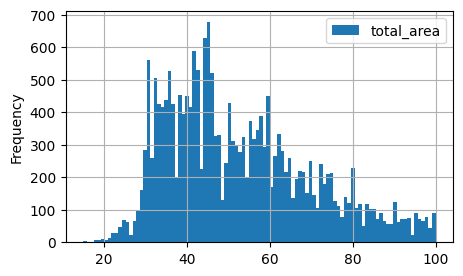

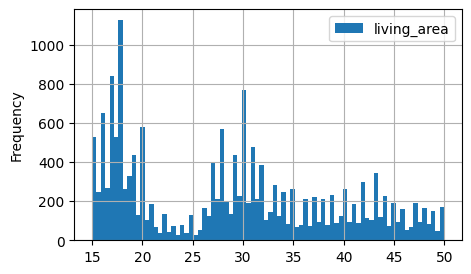

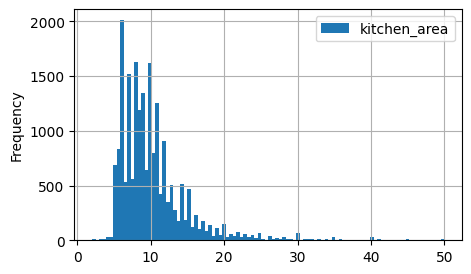

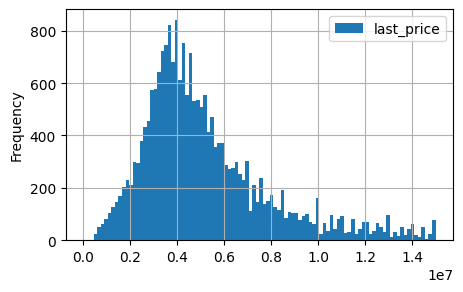

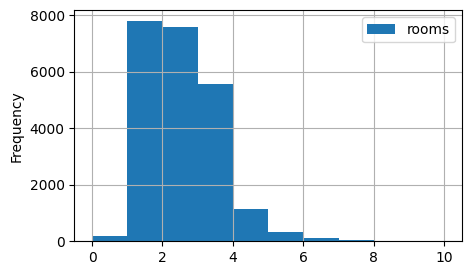

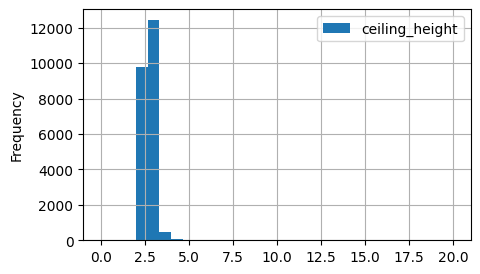

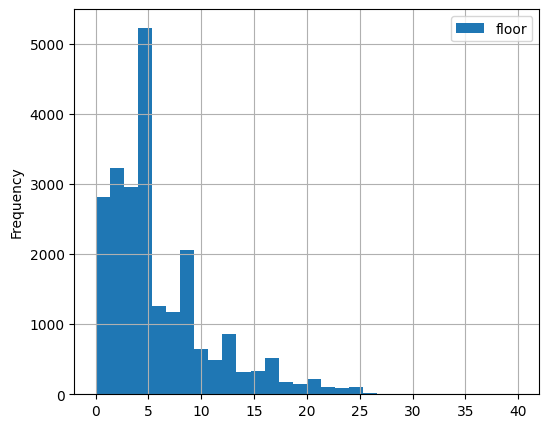

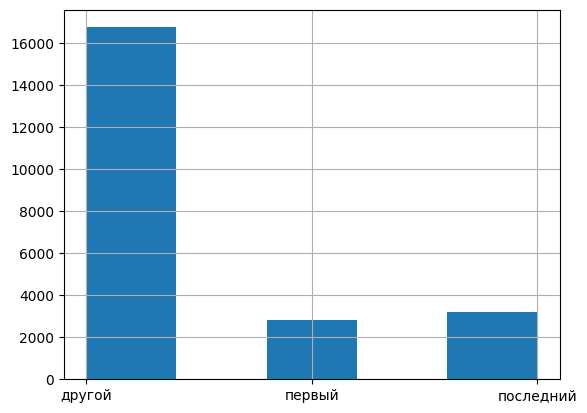

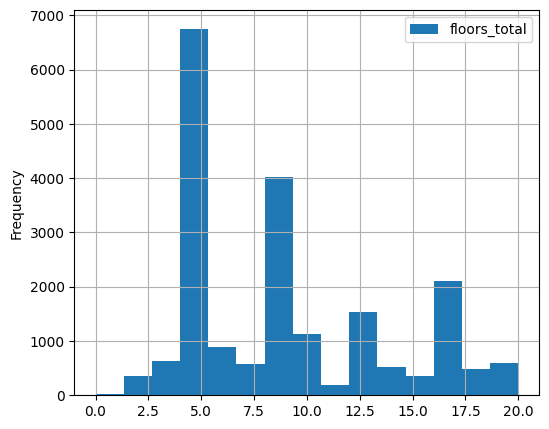

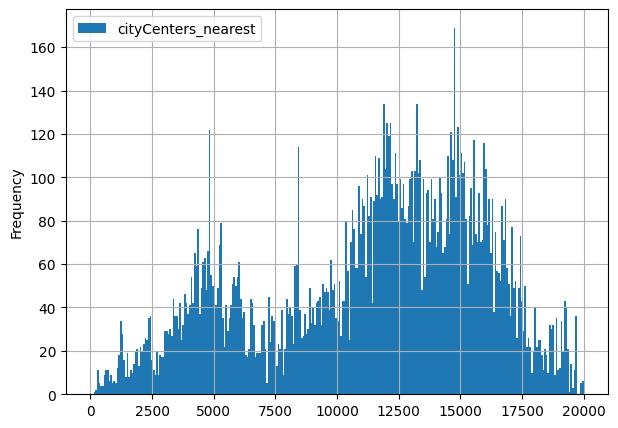

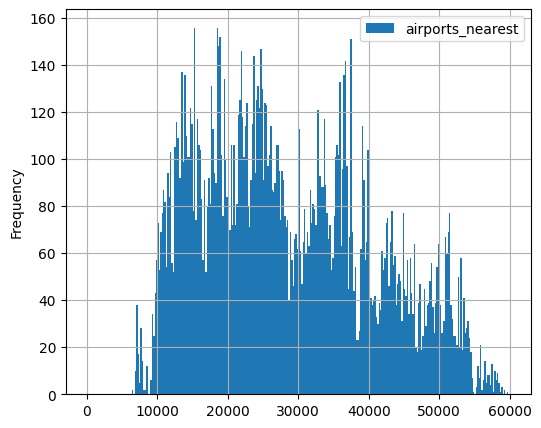

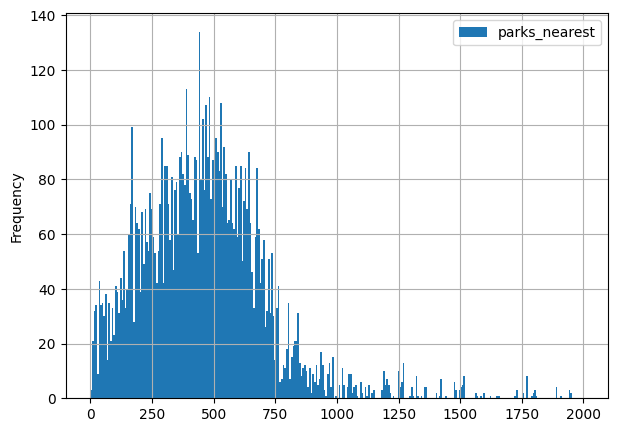

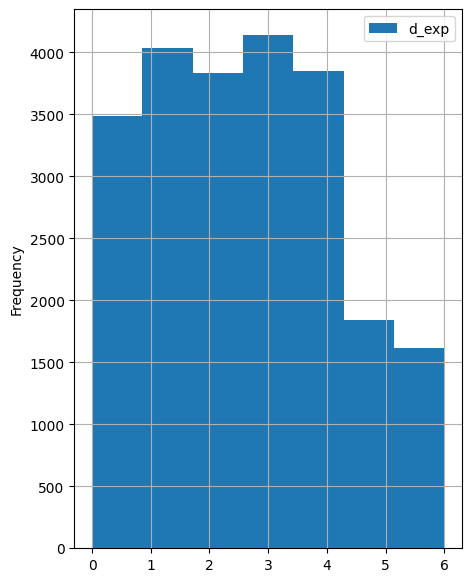

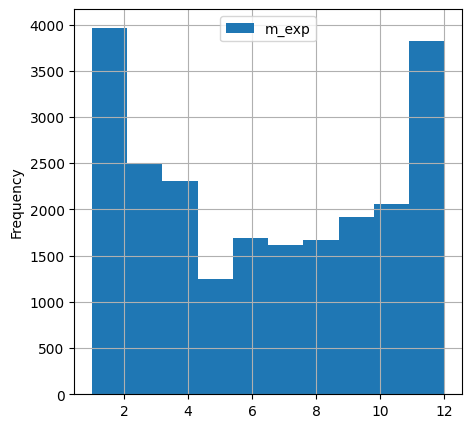

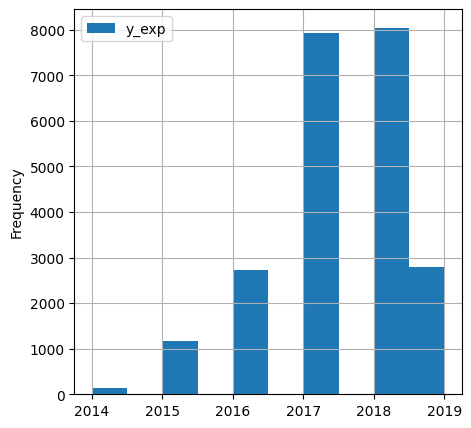

count    22795.000000
mean      2017.357403
std          1.046586
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: y_exp, dtype: float64

In [ ]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (15,100))
plt.show()
data['total_area'].describe()

data.plot(y = 'living_area', kind = 'hist', bins = 80, grid=True, figsize = (5,3), range = (15,50))
plt.show()
data['living_area'].describe()

data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (2,50))
plt.show()
data['kitchen_area'].describe()

data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
plt.show()
data['last_price'].describe()

data.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (5,3), range = (0,10))
plt.show()
data['rooms'].describe()

data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (0,20))
plt.show()
data['ceiling_height'].describe()

data.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, figsize = (6,5), range = (0,40))
plt.show()
data['floor'].describe()

data['floor_name'].hist(bins=5)
plt.show()
data['floor_name'].describe()

data.plot(y = 'floors_total', kind = 'hist', bins = 15, grid=True, figsize = (6,5), range = (0,20))
plt.show()
data['floors_total'].describe()

data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 300, grid=True, figsize = (7,5), range = (0,20000))
plt.show()
data['cityCenters_nearest'].describe()

data.plot(y = 'airports_nearest', kind = 'hist', bins = 300, grid=True, figsize = (6,5), range = (0,60000))
plt.show()
data['airports_nearest'].describe()

data.plot(y = 'parks_nearest', kind = 'hist', bins = 300, grid=True, figsize = (7,5), range = (0,2000))
plt.show()
data['parks_nearest'].describe()

data.plot(y = 'd_exp', kind = 'hist', bins = 7, grid=True, figsize = (5,7), range = (0,6))
plt.show()
data['d_exp'].describe()

data.plot(y = 'm_exp', kind = 'hist', bins = 10, grid=True, figsize = (5,5), range = (1,12))
plt.show()
data['d_exp'].describe()

data.plot(y = 'y_exp', kind = 'hist', bins = 10, grid=True, figsize = (5,5))
plt.show()
data['y_exp'].describe()

#не выявил аномалий, которые влияют на анализ. Выявлял через метод describe().
#не стал использовать функцию, тк использую везде разные показатели bins, figsize иrange

**Вывод**:
1. Преимущественно на рынке занимают квартиры с площадью 30-40 кв метров. Исходя из этих данных, примерно 20-30% занимают кухонная площадь, все остальное - жилая площадь;
2. В основном объявления состоят из квартир - число комнат в среднем 1-2;
3. В нашей выборке средняя высота квартир - 2.5 метра;
4. Судя по гистограмме, большинство объявлений в пятиэтажных домах;
5. Расстояние до центра города в среднем от 15 до 16 км;
6. Расстояние до аэропорта сложно оценить по среднему. В основном это расстояние от 20 км до 40 км;
7. Парки находятся в пешей доступности - всего 500 м в среднем;
8. Чаще всего выкладывают объявления с начала рабочей недели. Реже выкладывают объявления ближе к выходным;
9. Большее количество новых объявлений можно увидеть в начале и в конце года;
10. Большое количество объявлений в 2017 - 2018 годах;
11. Примерная средняя цена в объявлении - 4 - 5 млн рублей.


**Подведем промежуточный итог**:
Стоимость средней квартиры в Санкт-Петербурге и близлежащих населенных пунтков может достигать до 4 - 6 млн рублей.
Думаю, что площадь квартиры, количество комнат в ней, общее количество этажей в доме, расстояние до центра города, аэропорта и парков напрямую относятся к цене какой-либо квартиры.
Средняя квартира представляет собой двухкомнатую квартиру в пятиэтажном доме, у которой рядом находятся парк и центр города находится в 10 - 15 километрах от дома.

### Изучим насколько быстро продавались квартиры

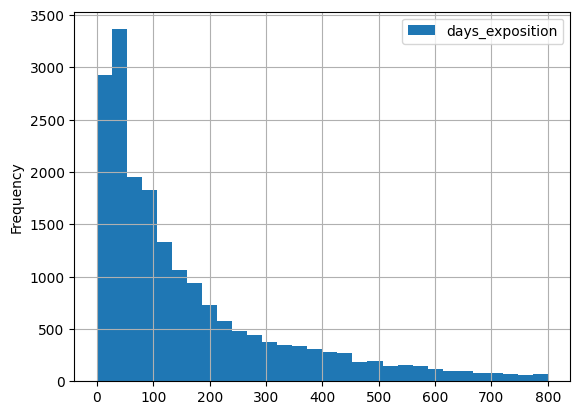

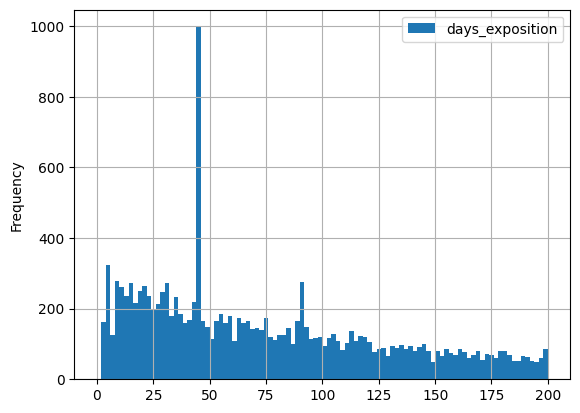

count    19638.000000
mean       186.426469
std        222.502455
min          1.000000
25%         45.000000
50%        102.000000
75%        241.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, range = (0,800))
plt.show() #первоначальная гистограмма

data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, range = (0,200))
plt.show() #на этой гистограмме нашел аномальные значения

data['days_exposition'].describe()

**Вывод**: самая быстрая покупка квартиры сразу в день ее публикации на сайте и до ~45 дней.
Исходя из метода describe можно отметить, что значения от 0 до 200 являются нормальными, поэтому предполагаю, что публикации после 200 дня с момента публикации - наиболее долгие.

### Изучим отношение цены квартиры к ее площади

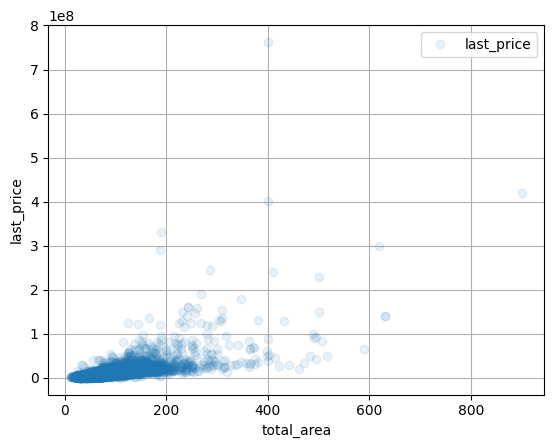

,last_price,total_area
last_price,1.000000,0.747328
total_area,0.747328,1.000000


In [ ]:
data.plot(y='last_price', x='total_area',xlabel='total_area', ylabel='last_price', style='o',alpha=0.1,grid=True)
plt.show()
#график зависимости цены и всей площади

data.pivot_table(index='floor', values=['total_area', 'last_price']).corr()
#коэфициент корреляции Пирсона

**Вывод**: прослеживается явная корреляция. Это нам может говорить коэфициент корреляции Пирсона, который составляет 0.74. Итог: чем больше площадь квартиры, тем больше стоимость.

### Изучим отношение цены квартиры к ее жилой площади

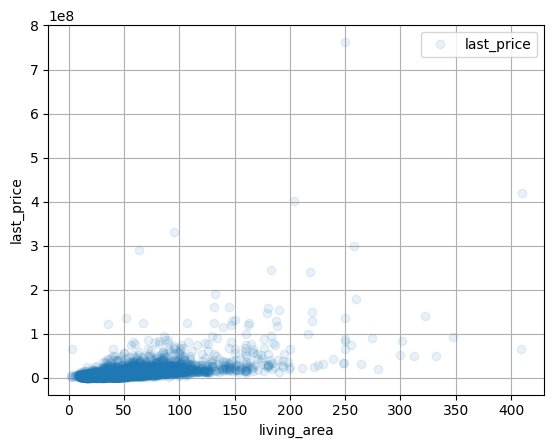

,last_price,living_area
last_price,1.000000,0.630569
living_area,0.630569,1.000000


In [ ]:
data.plot(y='last_price', x='living_area', ylabel='last_price',xlabel='living_area', style='o',alpha=0.1, grid=True)
plt.show()
#график зависимости цены от ее жилой площади

data.pivot_table(index='floor', values=['living_area', 'last_price']).corr()
#корреляция цены и жилой площади

**Вывод**: прослеживается аналогичная корреляция. Но коэфициент Пирсона значительно ниже - на 10% по сравнению с зависимостью цены от общей площади. При этом несильная зависимость есть: чем больше жилая площадь, тем выше стоимость. Думаю, такая зависимость связана с увеличением общей площади, так как с увеличением общей увеличивается и жилая.

### Изучим отношение цены квартиры к ее площади кухни

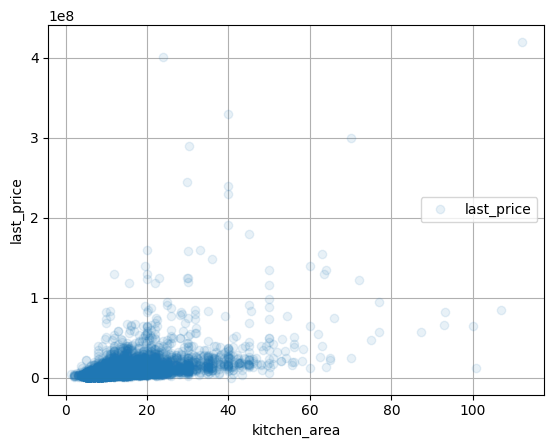

,kitchen_area,last_price
kitchen_area,1.000000,0.354288
last_price,0.354288,1.000000


In [ ]:
data.plot(y='last_price', x='kitchen_area', ylabel='last_price', xlabel='kitchen_area',style='o', alpha=0.1,grid=True)
plt.show()
#график зависимости цены от площади кухни

data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr()
#коэфициент корреляции Пирсона

**Вывод**: корреляция прослеживается, но очень слабая, о чем говорит нам коэфициент Пирсона.

### Изучим отношение цены квартиры к количеству комнат

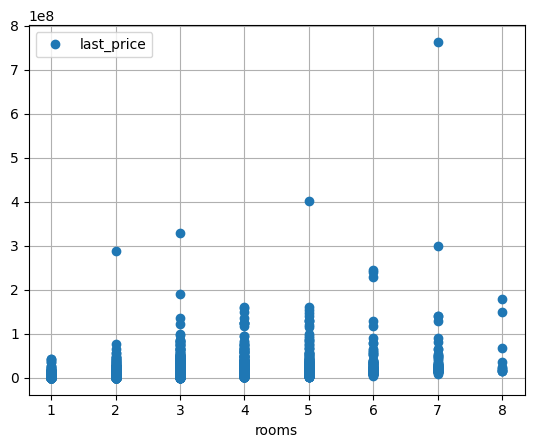

,last_price,rooms
last_price,1.000000,0.521905
rooms,0.521905,1.000000


In [ ]:
#data.pivot_table(index='rooms', values='last_price')
#data.query('rooms > 0 and rooms < 7').plot(x='rooms',y='last_price',style='o',grid=True)
data.query('rooms > 0 and rooms < 9').plot(x='rooms',y='last_price',style='o',grid=True)
plt.show()
#график зависимости цены от количества комнат

data.query('(rooms > 0) & (rooms < 9)').pivot_table(index='floor', values=['rooms', 'last_price']).corr()
#коэфициент корреляции Пирсона

**Вывод**: чем больше комнат в квартире, тем выше цена. Именно такую картину мы можем увидеть на графике. В свою очередь, коэфициент Пирсона составляет 0.5. Думаю, это связано с резким уменьшием стоимость после 7-8 комнат, как показано на графике.

### Изучим отношение цены квартиры к типу этажа

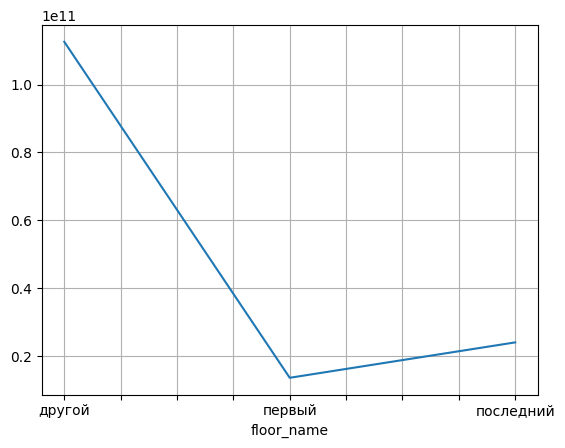

In [ ]:
data_gr = data.groupby('floor_name')['last_price'].sum()
data_gr.plot(x='floor_name', y='last_price',grid=True)
plt.show()
#график зависимости цены от типа этажа

**Вывод**: на графике видно, что квартира на первом из всех этажей наиболее дешевая. Далее идут квартиры на последнем этаже, они дороже на 10-15%, чем на первом.

### Изучим отношение цены квартиры к дате размещения

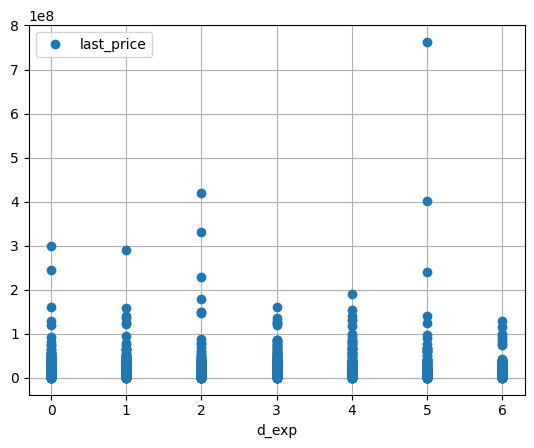

,d_exp,last_price
d_exp,1.000000,0.318278
last_price,0.318278,1.000000


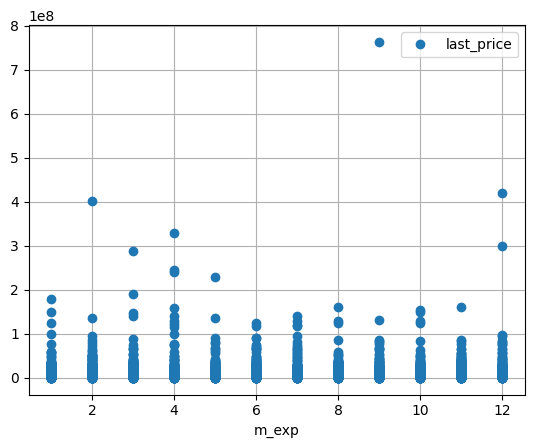

,last_price,m_exp
last_price,1.000000,-0.078097
m_exp,-0.078097,1.000000


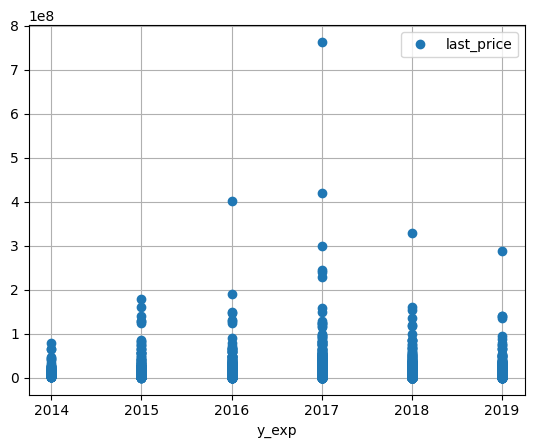

,last_price,y_exp
last_price,1.000000,-0.145092
y_exp,-0.145092,1.000000


In [ ]:
data.plot(x='d_exp',y='last_price',style='o',grid=True)
plt.show()
#таблица зависимости цены от дня недели

display(data.pivot_table(index='floor', values=['d_exp', 'last_price']).corr())

data.plot(x='m_exp',y='last_price',style='o',grid=True)
plt.show()
#таблица зависимости цены от месяца

display(data.pivot_table(index='floor', values=['m_exp', 'last_price']).corr())


data.plot(x='y_exp',y='last_price',style='o',grid=True)
plt.show()
#таблица зависимости цены от года

display(data.pivot_table(index='floor', values=['y_exp', 'last_price']).corr())

**Вывод**: по графику с днем недели видно, что стоимость квартиры к концу рабочей недели уменьшается. Можем сделать вывод о том, что в начале рабочей недели количество объявлений увеличивается, как это было описано ранее, из-за чего в будние дни цена растет.
То же самое можно сказать о месяце объявления. С июня по август цены дешевле, как и количество объявлений (в эти месяца объявлений меньше, чем в остальные, за исключением апреля).
Такие выводы могут говорить о некоторой сезонности в продажах квартир. Летом многие в отпусках, а с приходом выходных занимаются вопросами о квартире и
К 2015 и по 2017 годы цена резко снижалась, видимо, это связано с кризисом 2014 года.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

#### 10 населенных пунктов с наибольшим числом объявлений

,count,median
locality_name,,
санкт-петербург,15152,104739.165
поселок мурино,571,86119.400
деревня кудрово,449,95348.840
поселок шушары,424,76747.970
всеволожск,388,65667.560
пушкин,357,100000.000
колпино,328,74862.635
поселок парголово,314,91579.710
гатчина,298,67417.280


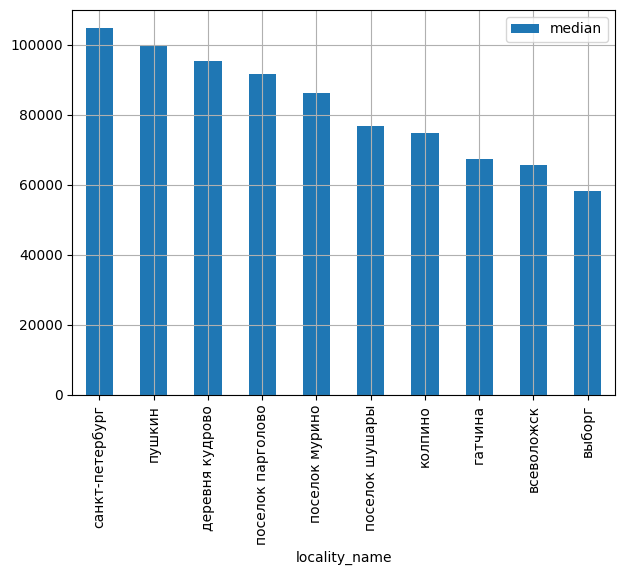

In [ ]:
top_exp = data.pivot_table(index='locality_name', values='square_price',aggfunc=['count','median'])
top_exp.columns = ['count','median']
top_exp = top_exp.sort_values('count',ascending=False).head(10)
display(top_exp)
#таблица с топ 10 населенными пунктами
top_exp.sort_values('median',ascending=False).plot(y='median', kind='bar', grid=True,figsize=(7,5))
plt.show()
#диаграмма по данной табличке

#### Наибольшая стоимость квадратного метра из 10 населенных пунктов

In [ ]:
top_exp.query('median == median.max()')

,count,median
locality_name,,
санкт-петербург,15152,104739.165


#### Наименьшая стоимость квадратного метра из 10 населенных пунктов

In [ ]:
top_exp.query('median == median.min()')

,count,median
locality_name,,
выборг,233,58108.11


**Вывод**: наиболее популярным из объявлений город - Санкт-Петербург. Больше всего объявлений и выше всего стоимость квадратного метра именно там.
Самая низкая стоимость квадратного метра в первом городе из списка (кроме Санкт-Петербурга) - Всеволожск.

### Стоимость квартир в зависимости от расстояния до центра города в Санкт-Петербурге

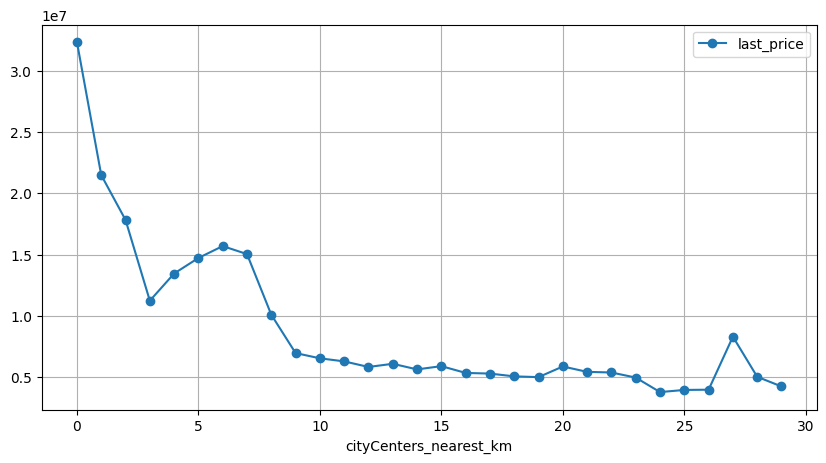

In [ ]:
spd_data = data.query('locality_name == "санкт-петербург"')
spd_data = spd_data.dropna(subset=['cityCenters_nearest_km'])
spd_data = spd_data.pivot_table(index='cityCenters_nearest_km',values='last_price')
spd_data.plot(style='-o', grid=True,figsize=(10,5))
plt.show()

**Вывод**: самая высокая цена находится на уровне до 5-7 км от центра города. Думаю, этим и будем считать центр города

## Общий вывод

**Первый этап исследования**:

Ознакомление с данными, постройка диаграмм по всем "числовым" колонкам. На данном этапе было выявлено, что не все колонки соответствуют своему предполагаемому типу.

**Второй этап исследования**:

В соответстввии с замечаниями на первом этапе исследования, были изменены типы колонок в таблице.

На этапе 2.1 были выявлены пустые значения в колонках, в таблице были заменены пустые значения в следующих колонках и было принято решение их преобразовать:
- `is_apartment` - по умолчанию изменено на 0 (пункт 2.2)
- `balcony` - по умолчанию изменено на 0 (пункт 2.2)
- `ponds_around3000` - по умолчанию изменено на 0 (пункт 2.2)
- `parks_around3000` - по умолчанию изменено на 0 (пункт 2.2)
- `locality_name` - пустые значения были удалены (пункт 2.3.1)
- `ceiling_height` - изменены на медианные значения по каждому населенному пункту (пункт 2.4.1).

Более подбробно про населенные пункты:
- были удалены строки с пустыми значениями населенных пунктов. Такие данные составили 0.2% от всего датасета (пункт 2.3.1);
- были замечены дубликаты населенных пунктов, которые различались наименованием - такие дубликаты были устранены (пункт 2.3.2).

Было замечено множество пустых значений в колонке с высотой потолков. Данные значения были изменены на медианные в соответствии от населенного пункта (пункт 2.4.1).

Были найдены аномальные значения:
- высота потолков - более 100 метров и менее 2 метров, данные значения были удалены, они составили 0.01% от всего датасета (пункт 2.4.2);
- день с момента размещения публикации - 7, 45 и 60 дней, данные значения были удалены, они составили 3.3% от всего датасета (пункт 2.6)

Удаленные пустые/аномальные значения составили 4% от всей таблицы. Делаем вывод о том, что они входят в допустимые рамки 5-10% от всей таблицы.

**Третий этап исследования**:

В таблицу были добавлены следующие 6 колонок:
- цена квадратного метра;
- день недели в момент публикации объявления (исходя из 0 - понедельник, 6 - воскресенье);
- месяц в году в момент публикации объявления (исходя из 1 - январь, 12 - декабрь);
- год в момент публикации объявления;
- тип этажа(первый, последний, другой);
- расстрояние до центра города в километрах.

**Четвертый этап исследования**:

Были построены диаграммы по количеству объявлений по следующим колонкам (пункт 4.1):
- общая площадь (средняя 30-40 кв м);
- жилая площадь (в среднем 80% от общей площади);
- кухонная площадь (в среднем 20% от общей площади);
- средняя высота (средняя 2.5 - 2.7 метров);
- количество комнат (в среднем 1 - 2 комнаты);
- всего этажей в доме (в основном пятиэтажные дома);
- тип этажа (большинство в "другом" этаже);
- расстояние до центра города (в среднем 15 - 16 км);
- расстояние до аэропорта (в среднем 20 - 40 км);
- расстояние до парков (в среднем 500 м);
- день, месяц и год объявлений (большинство объявлений: начало рабочей недели, конец и начало года, 2017 - 2018 годы);
- цена (средняя 4 - 5 млн рублей);

На основе полученных данных был сделан вывод о том, что средняя квартира в Санкт-Петербурге и близлежащих населенных пунктов выглядит следующим образом: квартира ценой 4 - 5 миллиона рублей, которая находится в пятиэтажном доме, общей площадью 30 - 40 кв м, которая вмещает в себя 1 - 2 комнаты, с высотой потолков под три метра (в среднем 2.5 - 2.7 м), у которой рядом есть парки, но далеко от центра - в среднем 15 км.

Далее я оценил скорость продажи квартир (пункт 4.2), где:
- быстрая покупка - до 45 дней с момента буликации;
- средняя покупку - до 200 дней с момента публикации;
- долгая покупка - более 200 дней с момента публикации.


Далее была произвеедна оценка корреляции цены и следующих показателей:
- общей площади - было выявлено: чем больше площадь, тем выше стоимость;
- жилой площади - такая же оценка, но коэфициент корреляции составил на 10% меньше по сравнению с общей площадью;
- кухонной площади - минимальный коэффициент корреляции. На 50% ниже общей площади, и на 40% ниже от жилой площади
- колличество комнат - прямое отношение между ценой и стоимостью до 7 - 8 комнаты;
- тип этажа - минимальные цены квартир на первом этаже;
- дата размещения (день, месяц, год) - ниже более подробно

Подробнее о зависимости цены объявления от даты размещения:
1. День размещения. Было выявлено большое количество объявлений, выложенных в начале рабочей недели, а также бОльшая стоимость квартир в начале недели. Можем сделать вывод о том, что в начале рабочей недели рынок более актуален, так как поступает больше объявлений, из-за чего вырастает и стоимость (примерно на 10%).
2. Месяц размещения. Стоит отметить, что под конец года стоимость квартир увеличивается так же, как и их предложение. Это может говорить нам о сезонности покупок квартир. Видимо, к началу года люди хотят сделать подарок. В этот период стоимость отличается от, например, летнего сезона на 10-15%.
3. Год размещения. Как и говорилось ранее, из-за кризиса, на рынке было максимум объявлений и по наиболее низкой цене (если рассматривать срезы по каждому отдельному году).

В ходе анализа было рассмотрено следующие 10 по количеству объявлений, из них на первом месте стал Санкт-Петербург, на основе которого я рассчитал стоимось километра до центра города.
На основе графика центр можно считать квартиры, находящихся до 7-8 километров от центра города, так как цена в таких квартирах наиболее высокая. Цена в таких квартирах может достигать до 70-80% от квартир, которые находятся дальше от центра.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод